## Tobigs 2주차 Linear Regression 과제
#### 15기 이윤정

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Linear Regression

### 데이터 전처리

In [4]:
data.shape

(6019, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
#총 6019개의 행 중 New_Price 변수는 5195개의 결측치를 지니므로, 변수 제거
data.drop(columns=['Unnamed: 0','New_Price'], inplace=True)

In [8]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [10]:
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [11]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70


In [12]:
data[data['Power']=='null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


In [13]:
data = data[data['Power']!='null bhp']

'Power' 변수에 null bhp라는 데이터 존재 - 결측치이므로 제거

In [14]:
#Engine, Power, Seats변수에 결측치가 존재하는 데이터는 대부분 일치하므로 결측치가 존재하는 행 삭제
data = data.dropna()
data.reset_index(inplace=True)

In [15]:
#변수 변환 (단위 제거 및 축약)
for i in range(0, 5872):
    data.at[i, 'Company'] = data['Name'][i].split()[0]
    data.at[i, 'Mileage(km/kg)'] = data['Mileage'][i].split()[0]
    data.at[i, 'Engine(CC)'] = data['Engine'][i].split()[0]
    data.at[i, 'Power(bhp)'] = data['Power'][i].split()[0]

In [16]:
data.drop(columns=['index','Name','Mileage','Engine','Power'], inplace=True)

In [17]:
data['Mileage(km/kg)'] = data['Mileage(km/kg)'].astype(float)
data['Engine(CC)'] = data['Engine(CC)'].astype(float)
data['Power(bhp)'] = data['Power(bhp)'].astype(float)

In [18]:
data['Seats'] = data['Seats'].astype(str)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   object 
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 550.6+ KB


In [20]:
data.describe()

,Year,Kilometers_Driven,Price,Mileage(km/kg),Engine(CC),Power(bhp)
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,9.603919,18.277839,1625.745572,113.276894
std,3.164568,9.216941e+04,11.249453,4.365657,601.641783,53.881892
min,1998.000000,1.710000e+02,0.440000,0.000000,624.000000,34.200000
25%,2012.000000,3.342250e+04,3.517500,15.260000,1198.000000,75.000000
50%,2014.000000,5.260900e+04,5.750000,18.200000,1495.500000,97.700000
75%,2016.000000,7.240275e+04,10.000000,21.100000,1991.000000,138.100000
max,2019.000000,6.500000e+06,160.000000,33.540000,5998.000000,560.000000


---


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C5F05C08>,
      dtype=object)

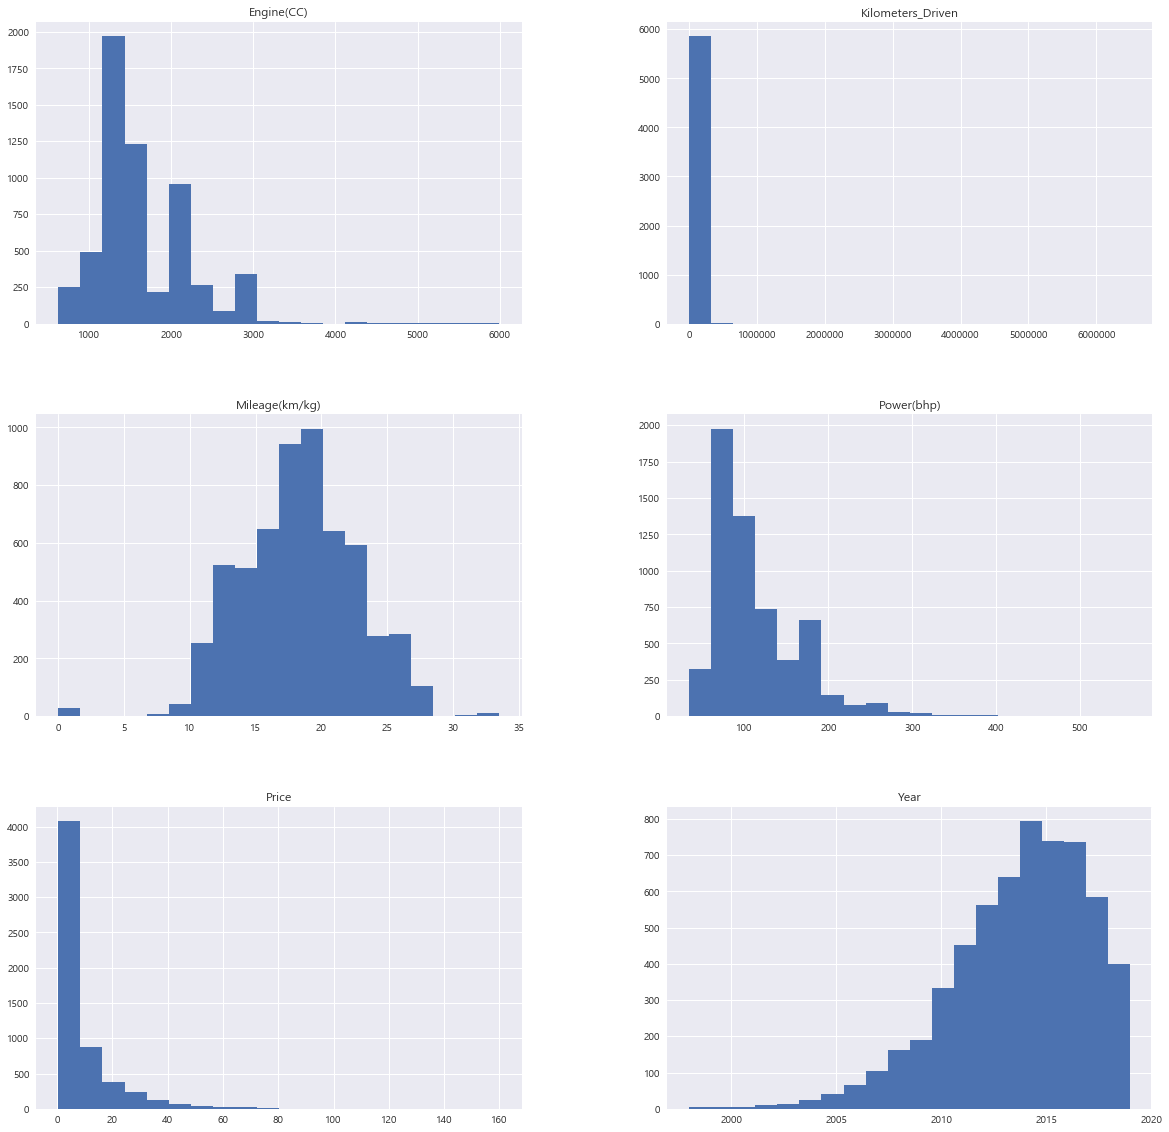

In [21]:
#수치형 변수의 분포 확인
num = ["Year","Kilometers_Driven","Price","Mileage(km/kg)", "Engine(CC)", "Power(bhp)"]
data[num].hist(bins=20, figsize=(20, 20))

- Kilometers_Driven 변수 확인 필요!
- Mileage(km/kg) 변수 확인 필요!

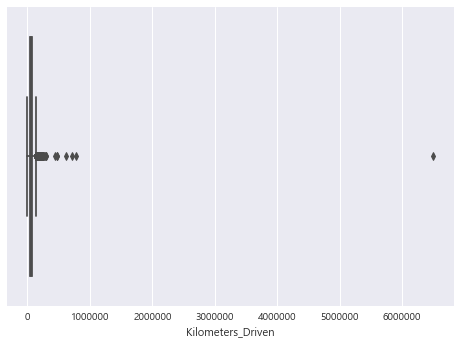

In [22]:
sns.boxplot(data['Kilometers_Driven'])

In [23]:
#Kilometers_Driven 변수의 값이 6000000 이상인 경우 이상치이므로 제거
data = data[data['Kilometers_Driven']<6000000]
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)

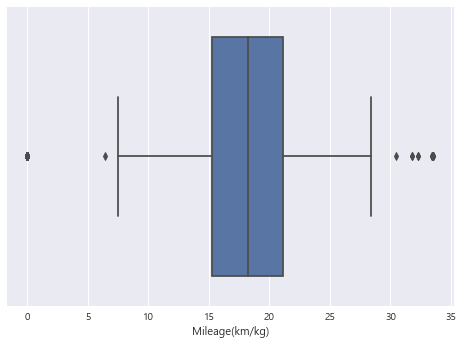

In [24]:
sns.boxplot(data['Mileage(km/kg)'])

In [25]:
mmean = data[data['Mileage(km/kg)'] != 0]['Mileage(km/kg)'].mean()
mmean

18.3658223515318

In [26]:
#0.0값을 평균값으로 대체
data['Mileage(km/kg)'].replace(0.0, mmean, inplace=True)

In [27]:
data.describe()

,Year,Kilometers_Driven,Price,Mileage(km/kg),Engine(CC),Power(bhp)
count,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000
mean,2013.477091,57219.795435,9.594483,18.365822,1625.512689,113.252243
std,3.164504,37767.720785,11.227150,4.178520,601.428284,53.853358
min,1998.000000,171.000000,0.440000,6.400000,624.000000,34.200000
25%,2012.000000,33420.000000,3.515000,15.300000,1198.000000,75.000000
50%,2014.000000,52600.000000,5.750000,18.365822,1495.000000,97.700000
75%,2016.000000,72394.500000,10.000000,21.100000,1991.000000,138.100000
max,2019.000000,775000.000000,160.000000,33.540000,5998.000000,560.000000


C:\Users\tldus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


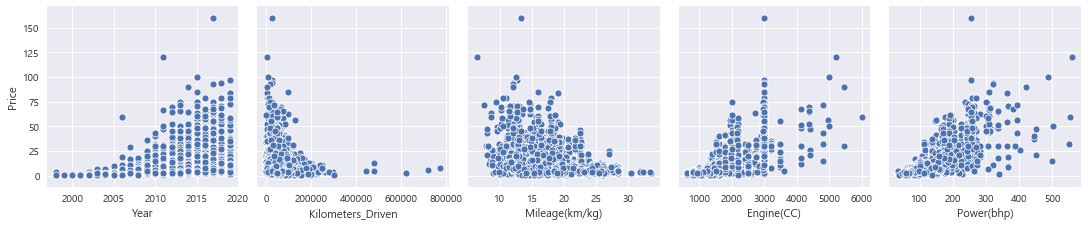

In [28]:
#수치형 변수 분포
num = ["Year","Kilometers_Driven", "Mileage(km/kg)", "Engine(CC)", "Power(bhp)"]
sns.pairplot(data, x_vars=num, y_vars='Price', size=3)

---
### 변수
#### Scaling
feature 간 범위 차이가 너무 많이 나므로 scaling이 필요하다. 이때, Kilometers_Driven 변수의 경우 최솟값과 최댓값의 간의 간극이 크기때문에 minmaxscaler보단 standardscaler가 적당하다

In [29]:
from sklearn.preprocessing import StandardScaler

num = ["Year","Kilometers_Driven", "Price", "Mileage(km/kg)", "Engine(CC)", "Power(bhp)"]
scaler = StandardScaler()
standsc = pd.DataFrame(scaler.fit_transform(data[num]),columns=num)

datasc = data.drop(num, axis=1)

In [30]:
datastsc = pd.concat([standsc,datasc],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C6CB5388>,
      dtype=object)

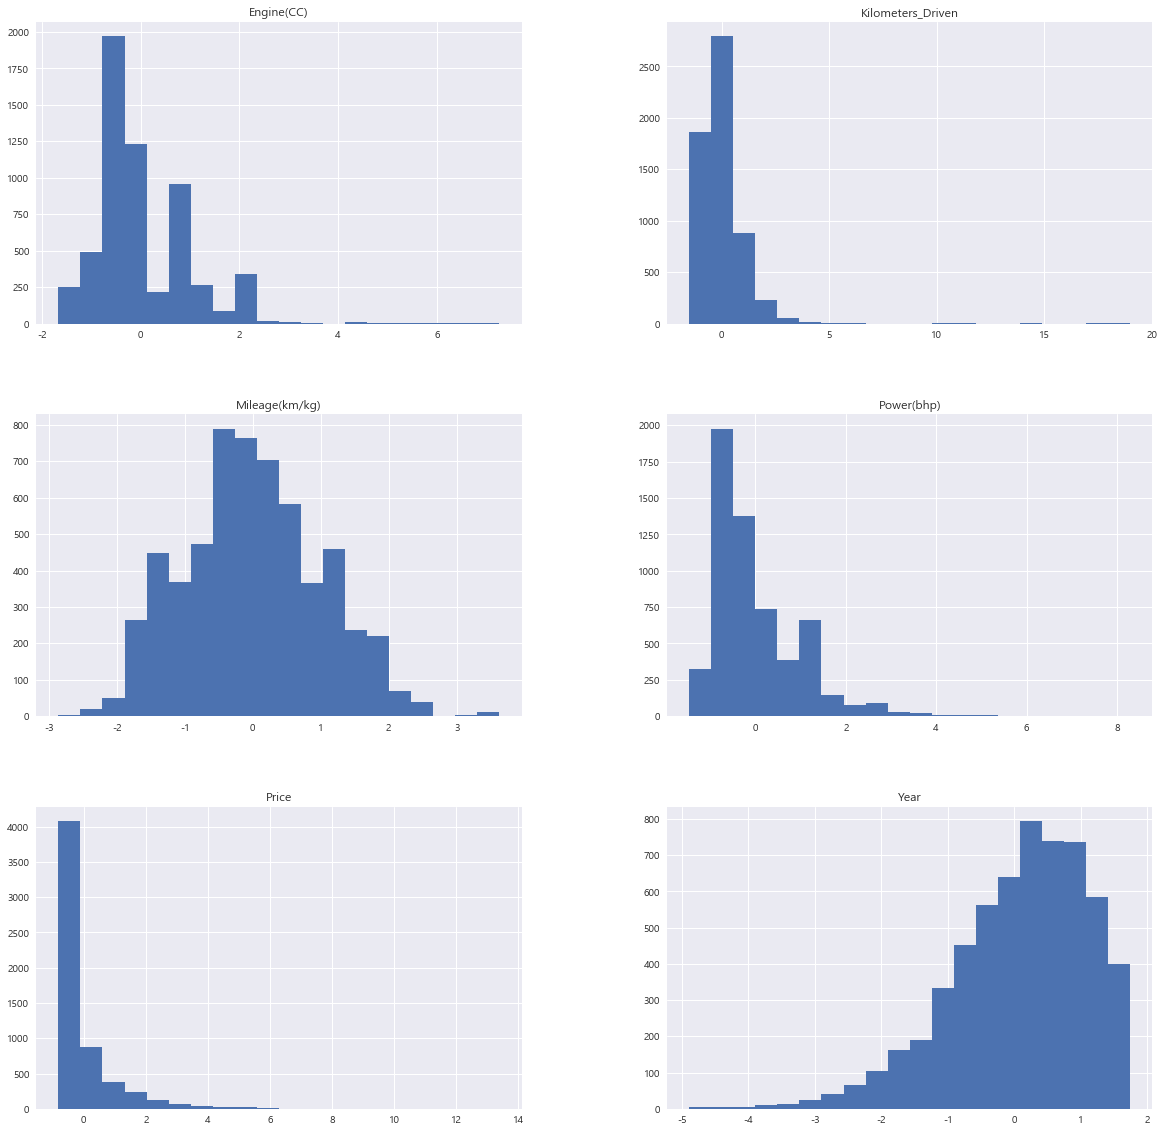

In [31]:
#수치형 변수의 분포 확인
num = ["Year","Kilometers_Driven","Price","Mileage(km/kg)", "Engine(CC)", "Power(bhp)"]
datastsc[num].hist(bins=20, figsize=(20, 20))

---
### 범주형 변수 
#### encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
#categorical feature 전처리
datastsc.columns[datastsc.dtypes == "object"]

le = LabelEncoder()

for i in datastsc.columns[datastsc.dtypes == "object"]:
    datastsc[i] = le.fit_transform(datastsc[i])
    
datastsc.columns

Index(['Year', 'Kilometers_Driven', 'Price', 'Mileage(km/kg)', 'Engine(CC)',
       'Power(bhp)', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Company'],
      dtype='object')

---
### 종속변수

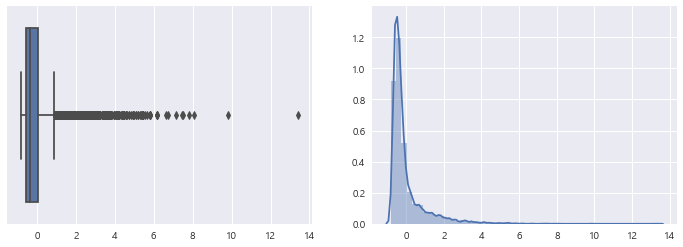

In [34]:
figure, ax = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(datastsc[["Price"]], ax=ax[0])
sns.distplot(datastsc[["Price"]],ax=ax[1])

- 매우 skewed 되어 있으므로 log 변환을 취해준다.

In [35]:
datastsc["log_Price"] = datastsc["Price"].transform(np.log1p)  #log1p 함수는 로그 변환 시 -inf 값이 되는 데이터를 0으로 자동 변환해주는 함수

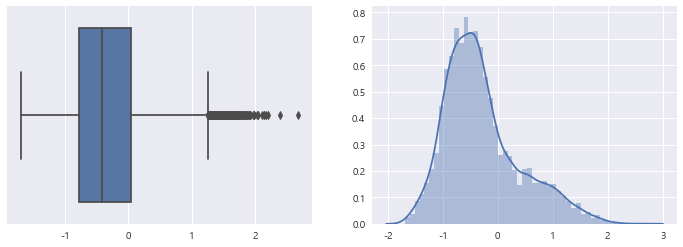

In [36]:
figure, ax = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(datastsc[["log_Price"]], ax=ax[0])
sns.distplot(datastsc[["log_Price"]],ax=ax[1])

- 정규분포의 양상을 보인다!

In [37]:
#Price 변수 제거
datastsc.drop(['Price'], axis = 1, inplace=True) 

---
#### 변수 간 상관관계

In [38]:
num = ["Year","Kilometers_Driven", "log_Price", "Mileage(km/kg)", "Engine(CC)", "Power(bhp)"]
datastsc[num].corr()

,Year,Kilometers_Driven,log_Price,Mileage(km/kg),Engine(CC),Power(bhp)
Year,1.000000,-0.445758,0.444020,0.293996,-0.068513,0.014032
Kilometers_Driven,-0.445758,1.000000,-0.175718,-0.139054,0.161086,0.003689
log_Price,0.444020,-0.175718,1.000000,-0.336685,0.704901,0.792374
Mileage(km/kg),0.293996,-0.139054,-0.336685,1.000000,-0.644745,-0.551953
Engine(CC),-0.068513,0.161086,0.704901,-0.644745,1.000000,0.866174
Power(bhp),0.014032,0.003689,0.792374,-0.551953,0.866174,1.000000


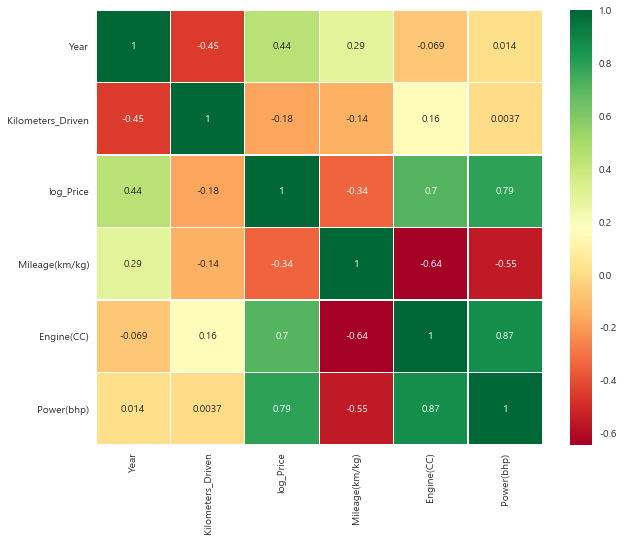

In [39]:
sns.heatmap(datastsc[num].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- Engine(CC) 변수와 Power(bhp) 변수 간의 상관관계가 매우 높다
- log_Price 변수와 Power(bhp) 변수 간의 상관관계가 매우 높다

In [40]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(datastsc[num].values, i) for i in range(datastsc[num].shape[1])]
vif["features"] = num
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
4,5.381017,Engine(CC)
5,5.337791,Power(bhp)
2,3.391422,log_Price
0,1.981202,Year
3,1.943285,Mileage(km/kg)
1,1.368874,Kilometers_Driven


다중공선성을 확인한 결과 10이상의 값이 없으므로 다중공선성 문제 X

---
## Modeling
#### 1. Linear Regression

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [42]:
X = datastsc.drop(['log_Price'],axis=1)
y = datastsc['log_Price']

In [43]:
# train test split (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4109, 11), (1762, 11), (4109,), (1762,))

In [45]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# predict
pred = model.predict(X_train)

In [47]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.8719514078272826

In [48]:
mean_squared_error(y_train, pred)

0.059603099158693044

In [49]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ 0.27641612 -0.03934308 -0.08131426  0.0622247   0.3293796  -0.01579745
 -0.13272585 -0.26418569 -0.01939895 -0.0091718  -0.00053328]
0.28451699637829914


In [50]:
# test data R-square
model.score(X_test, y_test)

0.8699210431148056

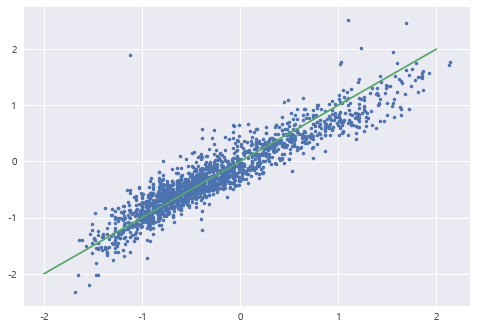

In [51]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(-2, 2, 200)
y = x
plt.plot(x, y)
plt.show()

- 모델과 직선이 거의 동일하게 분포되어있다. 그러나, 이상치로 추정되는 값이 plot에서 확인이 된다. 전처리 과정에서 간과한 이상치로 추정된다.

#### 2. Ridge & Lasso Regression

In [52]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
# predict
pred = ridge.predict(X_train)

In [54]:
# R-square
ridge.score(X_train,y_train)

0.8719513132661267

In [55]:
mean_squared_error(y_train, pred)

0.059603143174311285

In [56]:
print(ridge.coef_) # 추정된 회귀계수 (intercept제외)
print(ridge.intercept_) # intercept

[ 0.27635268 -0.03939351 -0.08124731  0.0626338   0.32909377 -0.01579974
 -0.13265568 -0.2638697  -0.01941714 -0.00926458 -0.0005398 ]
0.28458049010194136


In [57]:
# test data R-square
ridge.score(X_test, y_test)

0.8699087540097712

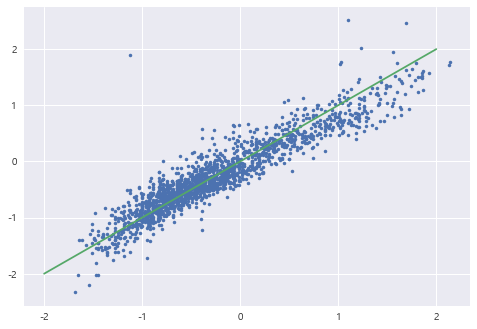

In [58]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, ridge.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(-2, 2, 200)
y = x
plt.plot(x, y)
plt.show()

- linear regression의 결과와 거의 동일하다.

In [59]:
# Lasso R-square
lasso=Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
# predict
pred = lasso.predict(X_train)

In [61]:
lasso.score(X_train, y_train)

0.869699338495055

In [62]:
mean_squared_error(y_train, pred)

0.06065137551568699

In [63]:
print(lasso.coef_) # 추정된 회귀계수 (intercept제외)
print(lasso.intercept_) # intercept

[ 2.71483787e-01 -2.87407254e-02 -5.57148563e-02  6.29957682e-02
  3.52593710e-01 -1.49903292e-02 -1.12291754e-01 -2.11464277e-01
 -5.59599859e-03  0.00000000e+00 -2.97329952e-04]
0.16440113398375572


In [64]:
# test data R-square
lasso.score(X_test, y_test)

0.8675343488931048

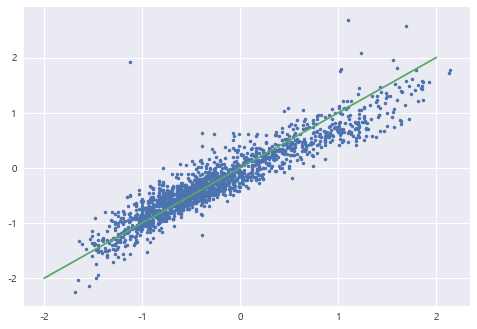

In [65]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, lasso.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(-2, 2, 200)
y = x
plt.plot(x, y)
plt.show()

- linear와 ridge regression과 유사한 결과가 도출되었다. 
- 추가로, lasso regression의 경우 유의미하지 않다고 판단되는 변수의 beta 값을 0으로 만들어 feature select의 효과도 지니고 있는 데 실제로 alpha를 0.3으로 두고 모델링을 진행했을 때 계수를 확인해본 결과 2가지를 제외한 모든 변수가 0의 값을 계수로 둔 것을 확인할 수 있었다.

----
#### 3. OLS

In [66]:
import statsmodels.api as sm

In [67]:
X = datastsc.drop(['log_Price'],axis=1)
y = datastsc['log_Price']

In [68]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_Price   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              4216.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        22:08:27   Log-Likelihood:                         -198.39
No. Observations:                5871   AIC:                                      418.8
Df Residuals:                    5860   BIC:                                      492.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [69]:
# p-value 값이 큰 age 변수 제거해보기 
X1 = X.drop(["Company"], axis=1)

In [70]:
model = sm.OLS(y, X1)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_Price   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              4635.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        22:08:27   Log-Likelihood:                         -199.91
No. Observations:                5871   AIC:                                      419.8
Df Residuals:                    5861   BIC:                                      486.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

R-squared 값은 변화가 없지만, AIC 값이 증가하고, BIC 값이 하락하였다. 

---
### 회귀분석 가정 검토

In [71]:
import scipy.stats

In [72]:
# 잔차 = 실제값 - 예측값 
residual = datastsc['log_Price'] - result.predict() 

In [73]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

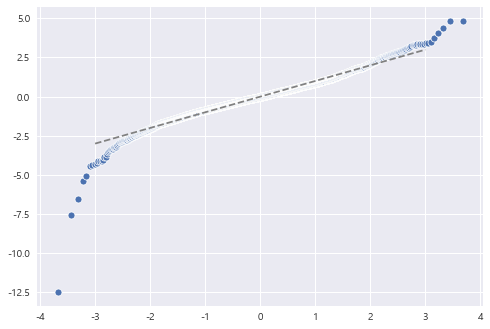

In [74]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

QQ plot을 보아 정규성을 만족한다는 것을 알 수 있다.

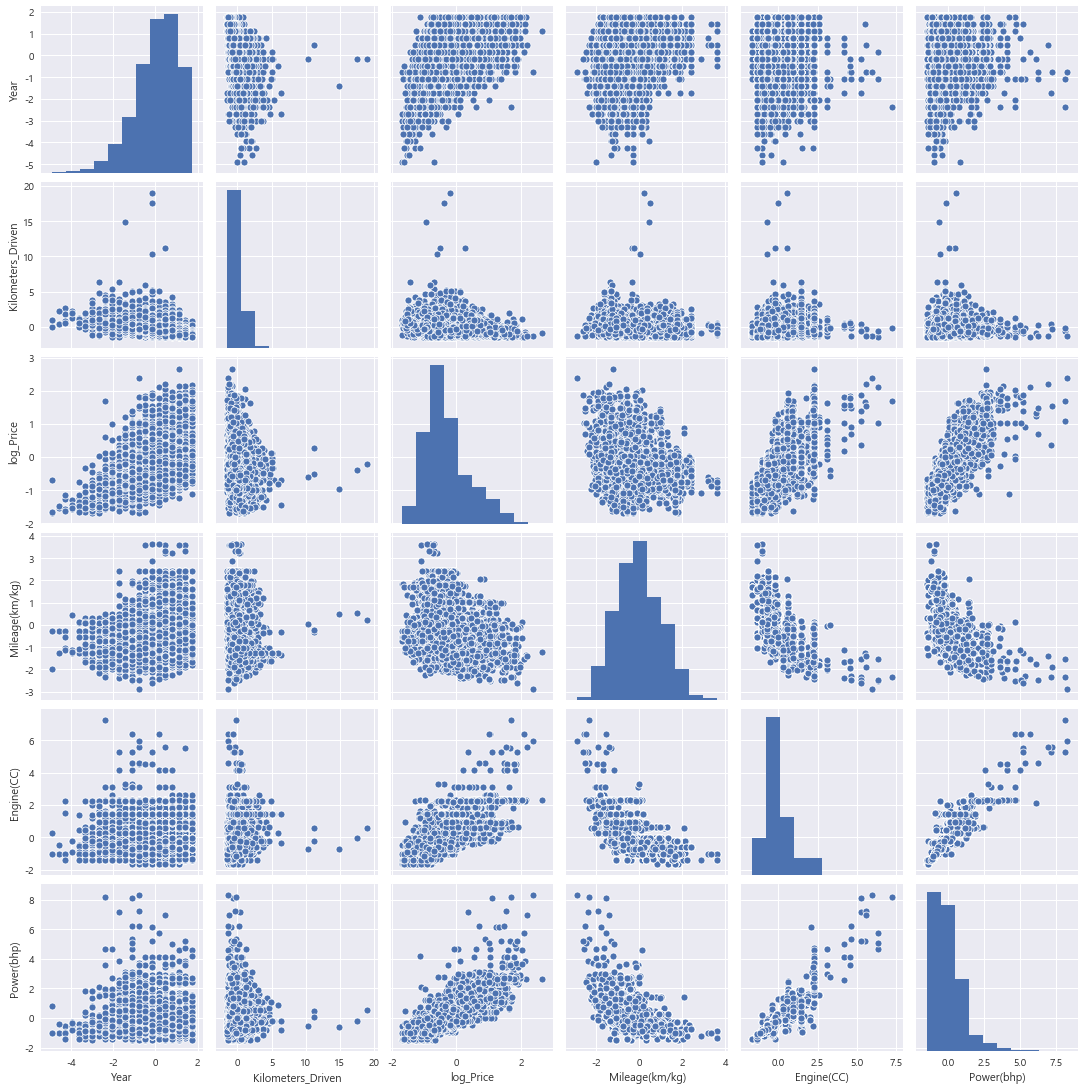

In [75]:
#변수 간 선형성
sns.pairplot(datastsc[num])

선형성을 만족한다고 볼 수 있다.

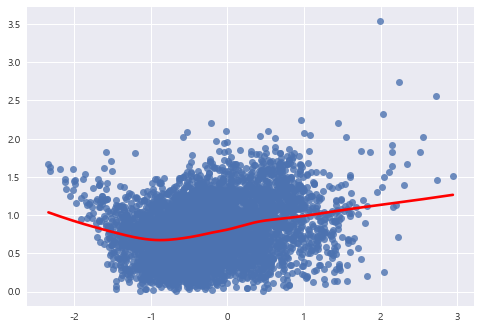

In [76]:
# 잔차의 등분산성 
pred = result.predict()
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

완벽한 직선이라고 볼 수는 없지만, 골고루 분포하고 있으므로 등분산성을 만족한다고 볼 수 있다